<a href="https://colab.research.google.com/github/DmitryPavlyuk/ai-aviation-engineering/blob/main/01.Introduction/1.4.PracticePandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice 1. Pandas - NASA Turbofan Jet Engine Data Set

Module: Artificial Intelligence for Aviation Engineering

Instructor: prof. Dmitry Pavlyuk

## pandas

__pandas__ is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

In [8]:
!pip install pandas

In [9]:
import pandas as pd

## Loading / Saving Data

### Loading data to pandas

* from CSV __read_csv__
* from XLS, XLSX __read_excel__
* from JSON __read_json__
* from databases __read_sql__
* from HTML __read_html__

Methods work not only for local files, but also accept URLs

# Data Set

CMAPSS Jet Engine Simulated Data

https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data


Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance.

## Loading data - options

.read_xxx has many parameters (50+) for

* Indexing - get column/row names from the file, arguments you provide, or not at all.
* Type inference and data conversion - including the user-defined value conversions, list of missing value markers, etc.
* Date and time parsing - parsing format, including merging several columns
* Iterating - support for iterating over chunks of very large files.
* Unclean data issues - skipping rows, comments, or other minor things like numeric data with thousands separated by commas
* Dialects (e.g., CSV dialect)

### Data Set: columns

In [10]:
column_names = ['engine', 'time', 'op_setting_1', 'op_setting_2',
                'op_setting_3'] + [f'sm_{i}' for i in range(1, 22)]
sensor_names={}
dict_list=[ "(Fan inlet temperature) (◦R)","(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]

i=1
for x in dict_list :
    sensor_names[f'sm_{i}']=x
    i+=1
sensor_names

{'sm_1': '(Fan inlet temperature) (◦R)',
 'sm_2': '(LPC outlet temperature) (◦R)',
 'sm_3': '(HPC outlet temperature) (◦R)',
 'sm_4': '(LPT outlet temperature) (◦R)',
 'sm_5': '(Fan inlet Pressure) (psia)',
 'sm_6': '(bypass-duct pressure) (psia)',
 'sm_7': '(HPC outlet pressure) (psia)',
 'sm_8': '(Physical fan speed) (rpm)',
 'sm_9': '(Physical core speed) (rpm)',
 'sm_10': '(Engine pressure ratio(P50/P2)',
 'sm_11': '(HPC outlet Static pressure) (psia)',
 'sm_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 'sm_13': '(Corrected fan speed) (rpm)',
 'sm_14': '(Corrected core speed) (rpm)',
 'sm_15': '(Bypass Ratio) ',
 'sm_16': '(Burner fuel-air ratio)',
 'sm_17': '(Bleed Enthalpy)',
 'sm_18': '(Required fan speed)',
 'sm_19': '(Required fan conversion speed)',
 'sm_20': '(High-pressure turbines Cool air flow)',
 'sm_21': '(Low-pressure turbines Cool air flow)'}

In [11]:
data_root = "https://raw.githubusercontent.com/DmitryPavlyuk/ai-aviation-engineering/refs/heads/main/CMAPSSData/"
df = pd.read_csv(data_root+ 'train_FD001.txt' , sep = ' ' , header=None, names=column_names, index_col=False )

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2772\2889083769.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(data_root+ 'train_FD001.txt' , sep = ' ' , header=None, names=column_names, index_col=False )


## Saving data

Very straightforward using __.to_XXX__ methods:
* .to_csv()
* .to_excel()
* .to_sql()
* .to_markdown()

## Pandas Data Structures

### Series and Dataframes

* __Series__
    * 1D array
    * Homogeneous
    * size immutable
* __DataFrame__
    * list of Series
    * 2D array
    * Heterogeneous
    * size mutable

### Dataset: Series

In [12]:
print(type(df["engine"]))
df["engine"].head(10)

<class 'pandas.core.series.Series'>


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: engine, dtype: int64

### DataFrame

In [13]:
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


Note the index!

## Pandas Data Types

### Python / NumPy / Pandas  Data Types

| Pandas dtype    | Python type  | NumPy type                                                      | Usage                                        |
| --------------- | ------------ | --------------------------------------------------------------- | -------------------------------------------- |
| object          | str or mixed | string\_, unicode\_, mixed types                                | Text or mixed numeric and non-numeric values |
| int64           | int          | int\_, int8, int16, int32, int64, uint8, uint16, uint32, uint64 | Integer numbers                              |
| float64         | float        | float\_, float16, float32, float64                              | Floating point numbers                       |
| bool            | bool         | bool\_                                                          | True/False values                            |
| datetime64      | NA           | datetime64\[ns\]                                                | Date and time values                         |
| timedelta\[ns\] | NA           | NA                                                              | Differences between two datetimes            |
| category        | NA           | NA                                                              | Finite list of text values                   |

### Dataframe dtypes

In [14]:
df.dtypes

engine            int64
time              int64
op_setting_1    float64
op_setting_2    float64
op_setting_3    float64
sm_1            float64
sm_2            float64
sm_3            float64
sm_4            float64
sm_5            float64
sm_6            float64
sm_7            float64
sm_8            float64
sm_9            float64
sm_10           float64
sm_11           float64
sm_12           float64
sm_13           float64
sm_14           float64
sm_15           float64
sm_16           float64
sm_17             int64
sm_18             int64
sm_19           float64
sm_20           float64
sm_21           float64
dtype: object

## Indexing

### Index properties

* Index is an immutable sequence, used for accessing any data point across the dataframe or series
* Rows and columns both have indexes: rows indices are called as __index__ and for __columns__ its general column names.
* Indexes support set operations like __union__, __intersection__, etc.
* Built-in indexes:
    * RangeIndex - a monotonic integer range.
    * NumericIndex - a sequence of numpy int/uint/float data.
    * CategoricalIndex - a sequence of fixed categories (strings)
    * DatetimeIndex - a sequence of datetime64 objects
    * TimedeltaIndex - a sequence of timedelta64 objects
    * PeriodIndex - a sequence of ordinal values indicating regular periods in time, e.g., period [Q-DEC]
    * IntervalIndex - a sequence of intervals, closed on the same side,e.g., (0, 1], (1, 2], (2, 3], (3, 4], (4, 5]

### Data set: Indexes

In [15]:
df.index

RangeIndex(start=0, stop=20631, step=1)

In [16]:
df.columns

Index(['engine', 'time', 'op_setting_1', 'op_setting_2', 'op_setting_3',
       'sm_1', 'sm_2', 'sm_3', 'sm_4', 'sm_5', 'sm_6', 'sm_7', 'sm_8', 'sm_9',
       'sm_10', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_16', 'sm_17',
       'sm_18', 'sm_19', 'sm_20', 'sm_21'],
      dtype='object')

## Assigning index

Indexes are immutable, but can be reassigned:

In [17]:
df.index = df['engine']
df.index

Index([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
       ...
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
      dtype='int64', name='engine', length=20631)

In [18]:
df.head()

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
engine,,,,,,,,,,,,,,,,,,,,,
1,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
1,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
1,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## Set/reset index

In [19]:
df.set_index("time", inplace=True)
df.head()

,engine,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
time,,,,,,,,,,,,,,,,,,,,,
1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
2,1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
3,1,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
4,1,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
5,1,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [20]:
df.reset_index(inplace=True)
df.head()

,time,engine,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,3,1,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,4,1,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,5,1,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## Duplicated index values

Index values are not necessarily unique (unlike _primary keys_ in databases), so selecting by index can return multiple records

In [21]:
df.set_index("engine", inplace=True)
df.loc[1,:].head()

,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
engine,,,,,,,,,,,,,,,,,,,,,
1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## Selectors


### Selectors loc/iloc

* __.loc__ selector works exclusively with index values
* __.iloc__ selector works exclusively with positions

In [22]:
df.iloc[[1]]
# Second row

,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
engine,,,,,,,,,,,,,,,,,,,,,
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.0,23.4236


In [23]:
df.loc[1].head()
# Rows for the 1st engine

,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
engine,,,,,,,,,,,,,,,,,,,,,
1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


### Default selector

"Default" selector  (df[...]) is a smart one:
* if the row index contains integers, then numbers interpreted as index values, otherwise - as position.
* if only one element is provided it is interpreted as a column name
* if a bool mask is provided it is applied to rows

etc. - long list of _ifs_


In [24]:
df[1:2]

,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
engine,,,,,,,,,,,,,,,,,,,,,
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.0,23.4236


### Default selector

In [25]:
df["op_setting_1"]

engine
1     -0.0007
1      0.0019
1     -0.0043
1      0.0007
1     -0.0019
        ...  
100   -0.0004
100   -0.0016
100    0.0004
100   -0.0011
100   -0.0032
Name: op_setting_1, Length: 20631, dtype: float64

In [26]:
df[df["op_setting_1"]>0]

,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
engine,,,,,,,,,,,,,,,,,,,,,
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,21.61,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,21.61,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
1,11,0.0018,-0.0003,100.0,518.67,642.28,1581.75,1400.64,14.62,21.61,...,521.40,2388.01,8140.58,8.4340,0.03,392,2388,100.0,38.94,23.4787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,184,0.0027,-0.0004,100.0,518.67,642.91,1598.88,1420.89,14.62,21.61,...,520.05,2388.20,8142.28,8.4989,0.03,396,2388,100.0,38.44,23.1229
100,186,0.0026,0.0004,100.0,518.67,643.61,1593.55,1425.32,14.62,21.61,...,520.66,2388.27,8138.08,8.4735,0.03,394,2388,100.0,38.51,23.1173
100,187,0.0015,0.0002,100.0,518.67,643.63,1596.96,1421.49,14.62,21.61,...,520.15,2388.22,8140.49,8.5087,0.03,396,2388,100.0,38.67,23.2308


I recommend to use __loc__ / __iloc__ instead of the default selector for disambiguity

## Sorting


### Sorting by index

* __.sort_index__ for sorting by index


In [27]:
df.reset_index().set_index("op_setting_1").sort_index().head(3)

,engine,time,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
op_setting_1,,,,,,,,,,,,,,,,,,,,,
-0.0087,83,86,-0.0001,100.0,518.67,642.50,1581.47,1398.62,14.62,21.61,...,522.58,2388.04,8141.51,8.4162,0.03,391,2388,100.0,39.13,23.4474
-0.0086,43,197,-0.0001,100.0,518.67,642.95,1603.35,1423.51,14.62,21.61,...,520.85,2388.24,8118.95,8.5095,0.03,395,2388,100.0,38.49,23.2057
-0.0084,25,166,0.0005,100.0,518.67,642.90,1585.92,1405.45,14.62,21.61,...,520.49,2388.13,8149.52,8.4340,0.03,394,2388,100.0,38.82,23.2087


### Sorting by column values

* __.sort_values__ for sorting by column values

In [28]:
df.sort_values("op_setting_1", ascending=False). head(3)

,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
engine,,,,,,,,,,,,,,,,,,,,,
64,254,0.0087,0.0005,100.0,518.67,643.68,1597.07,1426.57,14.62,21.61,...,520.93,2388.15,8165.96,8.4988,0.03,395,2388,100.0,38.41,23.0971
36,140,0.0083,-0.0001,100.0,518.67,644.01,1594.50,1428.70,14.62,21.61,...,520.15,2388.24,8134.89,8.4883,0.03,394,2388,100.0,38.63,23.1156
98,156,0.0077,-0.0003,100.0,518.67,643.02,1603.77,1432.16,14.62,21.61,...,519.55,2388.26,8122.22,8.5308,0.03,396,2388,100.0,38.33,23.1137


## Transforming column values

## Creating new / Transforming column values

* Direct function call for a Series or using __apply__ (__apply__ tranforming all values in the dataframe and  selecting the axis and transform columns or rows)

In [29]:
df["op_setting_1"] = df["op_setting_1"]*1000
df.head()

,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
engine,,,,,,,,,,,,,,,,,,,,,
1,1,-0.7,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,1.9,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,3,-4.3,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
1,4,0.7,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
1,5,-1.9,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [30]:
df["op_setting_1"] = df["op_setting_1"]/1000

### Dropping columns / rows

* Using __drop__ method


In [31]:
df.drop(columns=["sm_5","sm_6"], inplace=True)
df.head()

,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_7,sm_8,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
engine,,,,,,,,,,,,,,,,,,,,,
1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,554.36,2388.06,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,553.75,2388.04,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,554.26,2388.08,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,554.45,2388.11,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,554.00,2388.06,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## Statistics

### Statistics
Pandas DataFrames provide many frequently used methods:

In [32]:
df.reset_index(inplace=True)
df[["op_setting_1", "op_setting_2", "op_setting_3", "sm_1"]].mean()

op_setting_1     -0.000009
op_setting_2      0.000002
op_setting_3    100.000000
sm_1            518.670000
dtype: float64

In [33]:
df[["op_setting_1", "op_setting_2", "op_setting_3", "sm_1"]].max()

op_setting_1      0.0087
op_setting_2      0.0006
op_setting_3    100.0000
sm_1            518.6700
dtype: float64

### Statistics

In [34]:
df[["op_setting_1", "op_setting_2", "op_setting_3", "sm_1"]].describe()

,op_setting_1,op_setting_2,op_setting_3,sm_1
count,20631.000000,20631.000000,20631.0,2.063100e+04
mean,-0.000009,0.000002,100.0,5.186700e+02
std,0.002187,0.000293,0.0,6.537152e-11
min,-0.008700,-0.000600,100.0,5.186700e+02
25%,-0.001500,-0.000200,100.0,5.186700e+02
50%,0.000000,0.000000,100.0,5.186700e+02
75%,0.001500,0.000300,100.0,5.186700e+02
max,0.008700,0.000600,100.0,5.186700e+02


In [35]:
df[["op_setting_1", "op_setting_2", "sm_1"]].corr()

,op_setting_1,op_setting_2,sm_1
op_setting_1,1.00000,0.01166,NaN
op_setting_2,0.01166,1.00000,NaN
sm_1,NaN,NaN,NaN


## Plots

### Plots

Pandas DataFrames provide many frequently used plots:
* histograms
* pie charts
* boxplots
* lines
* scatters
etc.

### Histogram

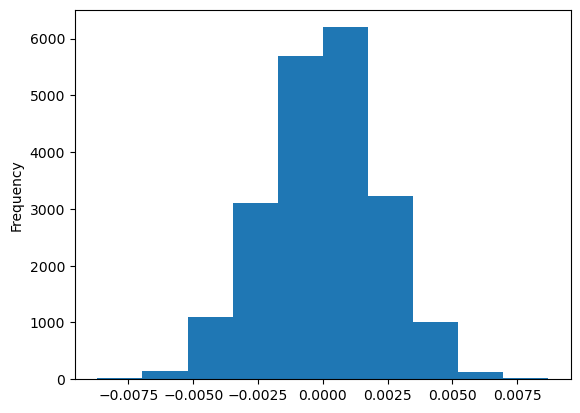

In [36]:
df["op_setting_1"].plot.hist();

### Lines

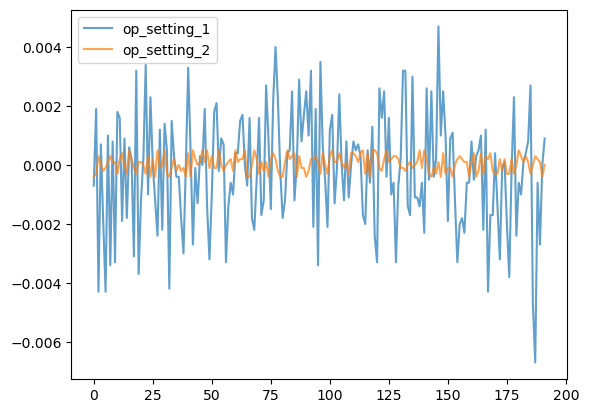

In [37]:
df[df["engine"]==1].sort_values("time")[["op_setting_1", "op_setting_2"]].plot.line(alpha=0.7);

### Boxplots

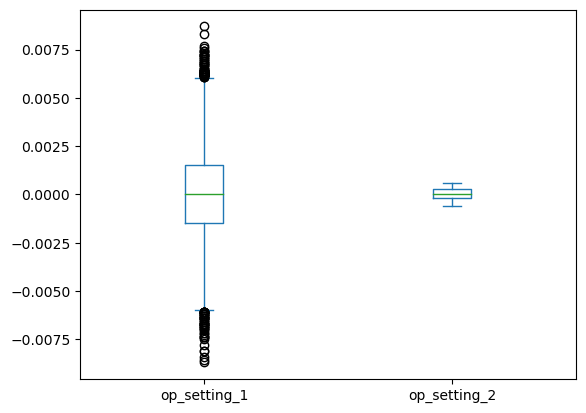

In [38]:
df[["op_setting_1", "op_setting_2"]].plot.box();

### Conclusion

Pandas is a pretty library with data manipulation routines:
1. Efficient data storage and computations - via NumPy
2. Indexes - database-like
3. Functions for data loading - easier than direct file reading/parsing
4. Functions for statistics - cover most frequently used descriptive statistics
5. Functions for plots - easier than plotting with specialised libraries
6. Flexibility - easy to extend with required data manipulation routines

# Thank you